In [1]:
! pip install keras --upgrade
! pip install tensorflow --upgrade

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.3.1)
Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.2.0rc3)


In [0]:
import os
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

from sklearn import metrics, svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

import cv2
from PIL import Image
from skimage import color

import pickle

In [0]:
blnLoaData =  True
blnBuildModel = True

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
binary_flder = '/content/drive/Shared drives/DS8013/Data/Binary/'


In [0]:
X = np.load(binary_flder + 'X.npy')
y = np.load(binary_flder + 'y.npy')
#y_onehot = np.load(binary_flder + 'y_onehot.npy')

In [0]:
X = X / 255 #normalize image

In [0]:
unique_elements, counts_elements = np.unique(y, return_counts=True)

In [9]:
(list(zip(unique_elements, counts_elements)))

[('AnnualCrop', 3000),
 ('Forest', 3000),
 ('HerbaceousVegetation', 3000),
 ('Highway', 2500),
 ('Industrial', 2500),
 ('Pasture', 2000),
 ('PermanentCrop', 2500),
 ('Residential', 3000),
 ('River', 2500),
 ('SeaLake', 3000)]

One-encoder for Y

In [0]:
# one hot encode

#label encoding to integer
le = preprocessing.LabelEncoder()
le.fit(y)

#after encoding
label_encoded = le.transform(y)

# one hot encode
y_onehot = to_categorical(label_encoded)

# Split data



In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42, shuffle=True)

In [12]:
le.inverse_transform([np.argmax(y_train[101])])

array(['Highway'], dtype='<U20')

In [13]:
X_train.shape

(21600, 64, 64, 3)

In [14]:
X_test.shape

(5400, 64, 64, 3)

In [15]:
y_train[0:10]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Applications trained on ImageNet


In [0]:
import keras
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.resnet import ResNet101
from tensorflow.keras.applications.resnet import ResNet152
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.nasnet import NASNetMobile

from tensorflow.keras.preprocessing import image
#from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras import models, layers
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras import Sequential
import numpy as np


In [26]:
#use dymamic code

# #build code to execute
# src = ''
# for model in models:
#   src += "model{0} = {0}(weights='imagenet', include_top=False, input_shape=(64,64,3))\n".format(model)

# print(src)
# var = {}
# exec(src, var)

modelResNet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(64,64,3))
modelResNet101 = ResNet101(weights='imagenet', include_top=False, input_shape=(64,64,3))
modelResNet152 = ResNet152(weights='imagenet', include_top=False, input_shape=(64,64,3))


modelVGG16 = VGG16(weights='imagenet', include_top=False, input_shape=(64,64,3))
modelVGG19 = VGG19(weights='imagenet', include_top=False, input_shape=(64,64,3))

modelInceptionV3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(75,75,3))
modelInceptionResNetV2 = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(75,75,3))
modelMobileNet = MobileNet(weights='imagenet', include_top=False, input_shape=(64,64,3))
modelDenseNet121 = DenseNet121(weights='imagenet', include_top=False, input_shape=(64,64,3))
modelNASNetMobile = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224,224,3))

baseModels = [
              {'name':'ResNet50', 'model':modelResNet50, 'input_shape':(64,64)},
              {'name':'ResNet101', 'model':modelResNet101, 'input_shape':(64,64)},
              {'name':'ResNet152', 'model':modelResNet152, 'input_shape':(64,64)},
              {'name':'VGG16', 'model':modelVGG16, 'input_shape':(64,64)},
              {'name':'InceptionV3',  'model':modelInceptionV3, 'input_shape':(75,75)},
              {'name':'InceptionResNetV2', 'model':modelInceptionResNetV2, 'input_shape':(75,75)},
              {'name':'MobileNet', 'model':modelMobileNet, 'input_shape':(64,64)},
              {'name':'DenseNet121', 'model':modelDenseNet121, 'input_shape':(64,64)},
              {'name':'NASNetMobile', 'model':modelNASNetMobile, 'input_shape':(224,224)}
              ] 


In [27]:
models = pickle.load(open(model_flder + 'normal_tf_models.p', 'rb'))   

modelsTrained = [m['model'] for m in models]
modelsTrained

# for baseModel in baseModels:
#   print(baseModel['name'])
#   if 'TF_' + baseModel['name'] + '.mdl' not in modelsTrained: 
#     print(False)
#   else:
#     print(True)

ResNet50
True
ResNet101
False
ResNet152
False
VGG16
True
InceptionV3
False
InceptionResNetV2
False
MobileNet
True
DenseNet121
True
NASNetMobile
False


In [28]:
maxIter = 10
model_flder = '/content/drive/Shared drives/DS8013/Model/'

if blnBuildModel:
  #models = []
  TFmodels = []
  for baseModel in baseModels:
    print('base:' + baseModel['name'])
    if 'TF_' + baseModel['name'] + '.mdl' not in modelsTrained: 
      model = Sequential([baseModel['model'],  layers.Flatten(),
                        layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001))])

      #optimizer
      lr = 1e-4
      sgd = optimizers.SGD(learning_rate=lr, momentum=0.9, nesterov=True)

      # Compile the model
      model.compile(loss=keras.losses.categorical_crossentropy, optimizer=sgd, metrics=["accuracy"])
      
      if baseModel['input_shape'] == (64,64):
        hist = model.fit(X_train, y_train, epochs=maxIter, validation_data = (X_test, y_test), verbose=1)
      else:   #some architecture requires larger size
        X_train_img = [Image.fromarray(x, 'RGB') for x in X_train]
        X_test_img = [Image.fromarray(x, 'RGB') for x in X_test]

        X_train_resized = np.array([np.asarray(img.resize(baseModel['input_shape'])) for img in X_train_img])
        X_test_resized = np.array([np.asarray(img.resize(baseModel['input_shape'])) for img in X_test_img])
        hist = model.fit(X_train_resized, y_train, epochs=maxIter, validation_data = (X_test_resized, y_test), verbose=1)


      modelName = 'TF_{0}.mdl'.format(baseModel['name'])
      
      model.save(model_flder + modelName)

      TFmodels.append(model)
      models.append({'model':modelName, 'learn_rate':lr, 'hist':hist.history})

      pickle.dump(models, open(model_flder + 'normal_tf_models.p' , "wb" ) )

      model.summary()
    else:
      print('already trained')
else:
  models = pickle.load(open(model_flder + 'normal_tf_models.p', 'rb'))    

base:ResNet50
already trained
base:ResNet101
Epoch 1/10
675/675 [==============================] - 54s 80ms/step - loss: 0.6366 - accuracy: 0.8121 - val_loss: 90.6674 - val_accuracy: 0.0765
Epoch 2/10
675/675 [==============================] - 52s 77ms/step - loss: 0.2294 - accuracy: 0.9311 - val_loss: 0.2600 - val_accuracy: 0.9209
Epoch 3/10
675/675 [==============================] - 52s 77ms/step - loss: 0.1540 - accuracy: 0.9564 - val_loss: 0.2012 - val_accuracy: 0.9409
Epoch 4/10
675/675 [==============================] - 52s 78ms/step - loss: 0.1217 - accuracy: 0.9667 - val_loss: 0.2001 - val_accuracy: 0.9433
Epoch 5/10
675/675 [==============================] - 52s 78ms/step - loss: 0.0996 - accuracy: 0.9737 - val_loss: 0.1794 - val_accuracy: 0.9511
Epoch 6/10
675/675 [==============================] - 52s 78ms/step - loss: 0.0795 - accuracy: 0.9802 - val_loss: 0.1819 - val_accuracy: 0.9539
Epoch 7/10
675/675 [==============================] - 53s 78ms/step - loss: 0.0711 - accur

In [47]:

models   

[{'hist': {'accuracy': [0.8952314853668213,
    0.9531944394111633,
    0.9680092334747314,
    0.974907398223877,
    0.9803703427314758,
    0.9833333492279053,
    0.9848611354827881,
    0.9882407188415527,
    0.9883333444595337,
    0.9920833110809326],
   'loss': [0.35938096046447754,
    0.15837322175502777,
    0.11320019513368607,
    0.09927672147750854,
    0.07918292284011841,
    0.068947933614254,
    0.06514914333820343,
    0.057060450315475464,
    0.05477180331945419,
    0.045888498425483704],
   'val_accuracy': [0.9399999976158142,
    0.9466666579246521,
    0.9407407641410828,
    0.9570370316505432,
    0.9570370316505432,
    0.9594444632530212,
    0.9581481218338013,
    0.9574074149131775,
    0.9599999785423279,
    0.9596296548843384],
   'val_loss': [0.21450766921043396,
    0.18365740776062012,
    0.21085897088050842,
    0.1678842306137085,
    0.16346225142478943,
    0.1608276069164276,
    0.15803928673267365,
    0.16951096057891846,
    0.15806010

In [0]:
models = pickle.load(open(model_flder + 'normal_tf_models.p', 'rb')) 

In [73]:
# Comparison of all models

modelName = [m['model'] for i,m in enumerate(models) ]
modelAccuracy = [m['hist']['val_accuracy'][maxIter - 1] for m in models ]
modelLoss = [m['hist']['val_loss'][maxIter-1] for m in models ]

df = pd.DataFrame({'model':modelName, 'accuracy':modelAccuracy, 'loss':modelLoss})
df = df.sort_values('accuracy', ascending=False)

df

,model,accuracy,loss
3,TF_DenseNet121.mdl,0.968518,0.120787
1,TF_VGG16.mdl,0.964815,0.132490
0,TF_ResNet50.mdl,0.959630,0.165175
4,TF_ResNet101.mdl,0.957963,0.153410
2,TF_MobileNet.mdl,0.952222,0.169753
5,TF_ResNet152.mdl,0.917407,0.811795
6,TF_InceptionV3.mdl,0.323333,1.876793
7,TF_InceptionResNetV2.mdl,0.310000,2.321598
8,TF_NASNetMobile.mdl,0.213519,3.483722


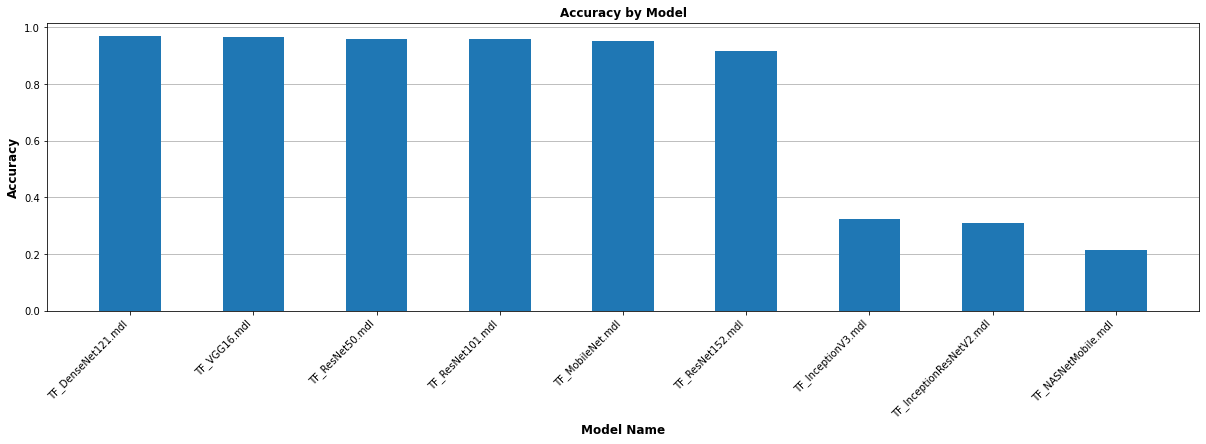

In [74]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_axes([0,0,1,1])
ax.grid(axis='y', which='both')
ax.set_axisbelow(True)
ax.bar(df.model,df.accuracy, width=0.5)
ax.set_ylabel('Accuracy', fontsize='large', fontweight='bold')
ax.set_xlabel('Model Name', fontsize='large', fontweight='bold')
ax.set_title('Accuracy by Model', fontsize='large', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

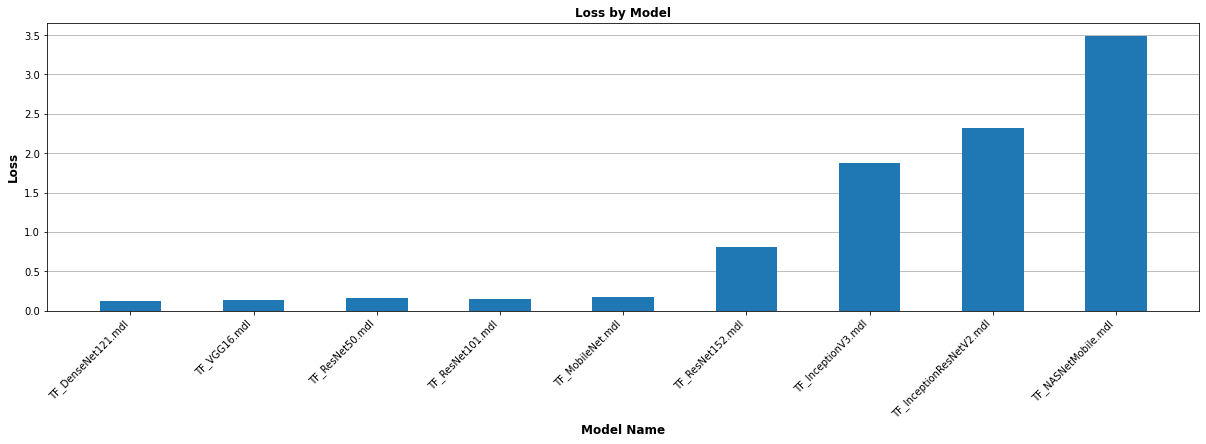

In [75]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_axes([0,0,1,1])
ax.grid(axis='y', which='both')
ax.set_axisbelow(True)
ax.bar(df.model,df.loss, width=0.5)
ax.set_ylabel('Loss', fontsize='large', fontweight='bold')
ax.set_xlabel('Model Name', fontsize='large', fontweight='bold')
ax.set_title('Loss by Model', fontsize='large', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

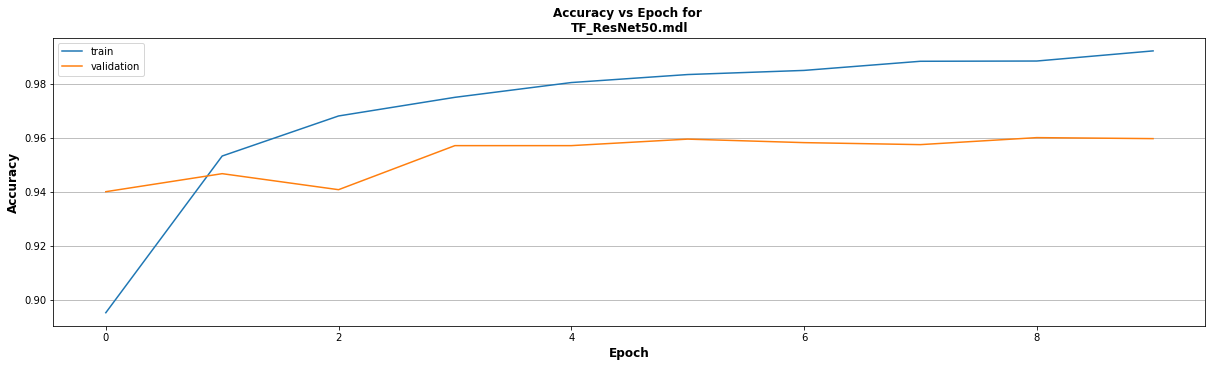

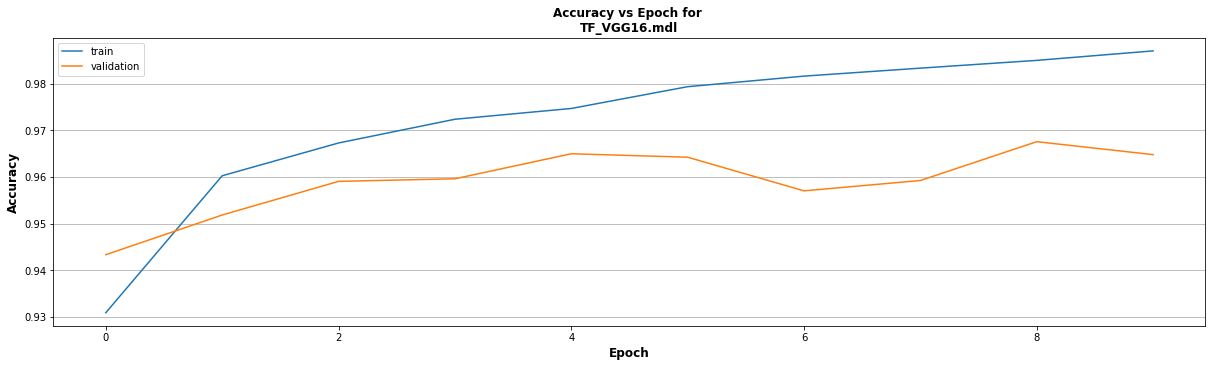

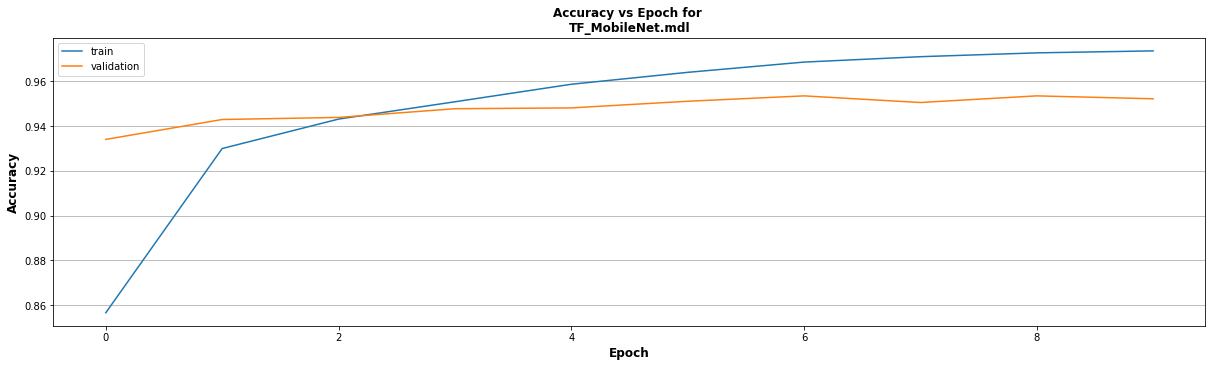

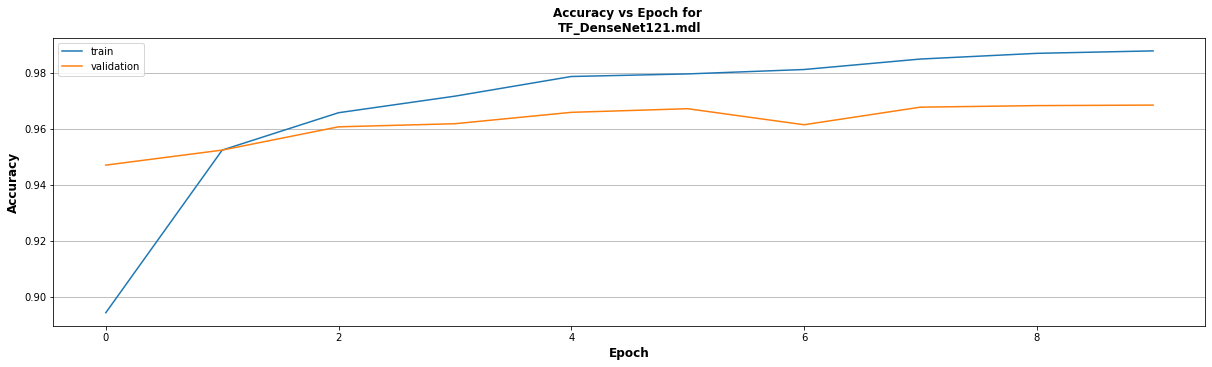

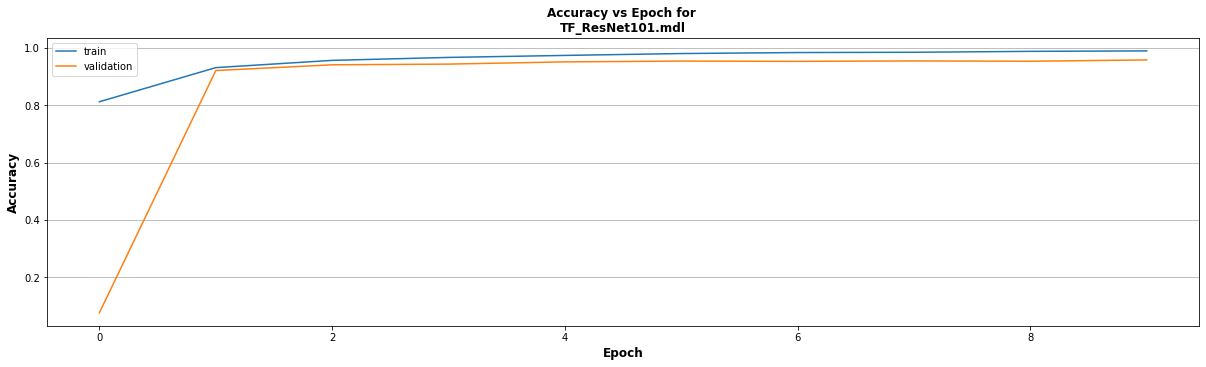

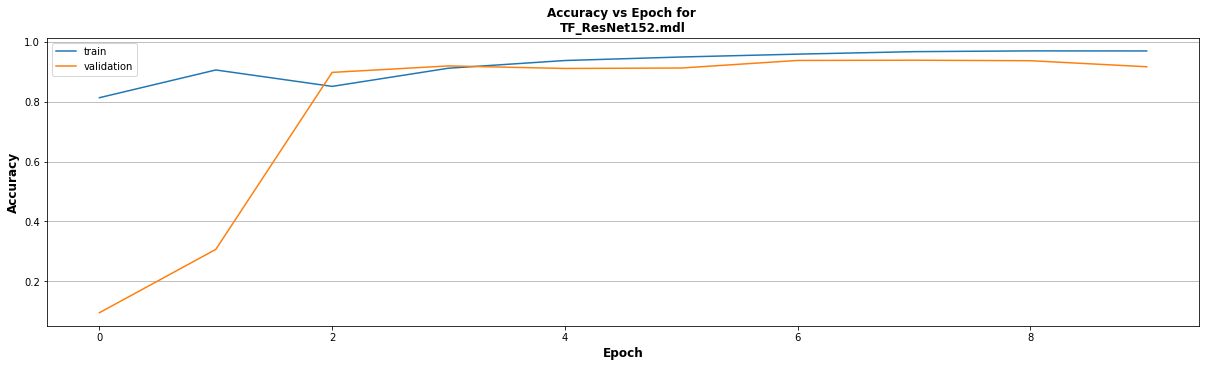

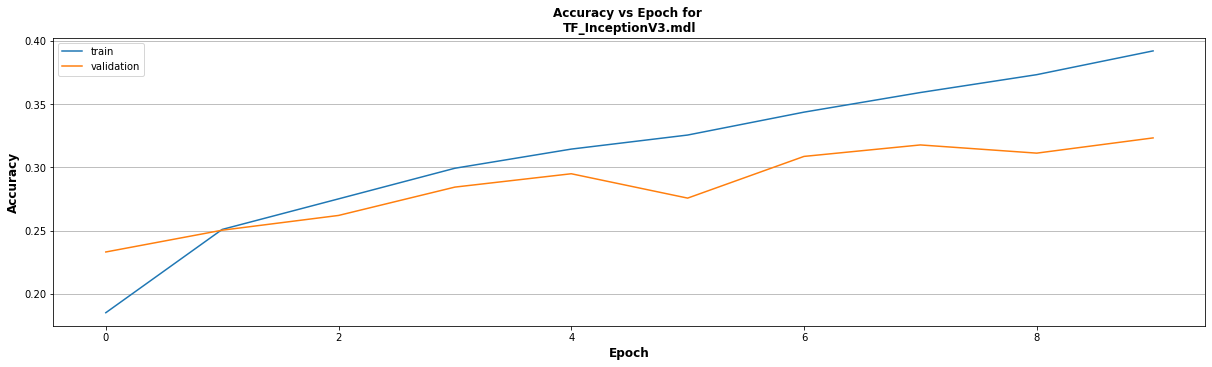

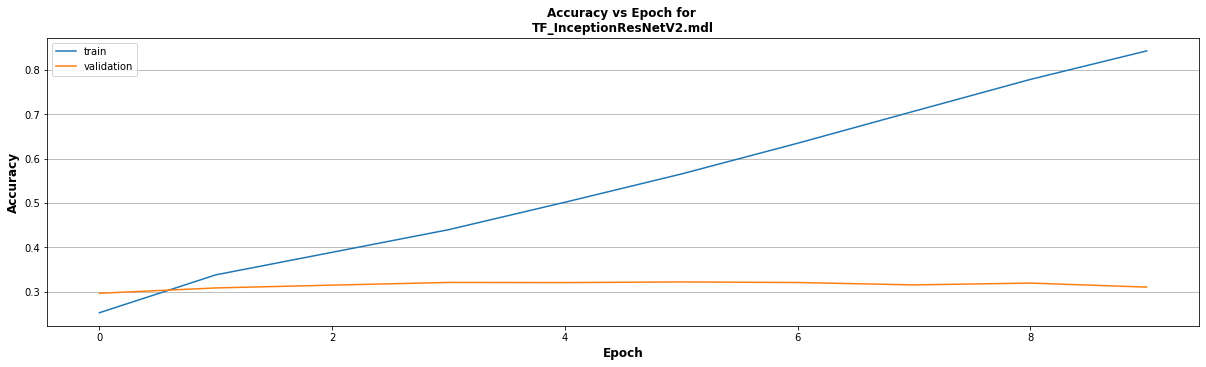

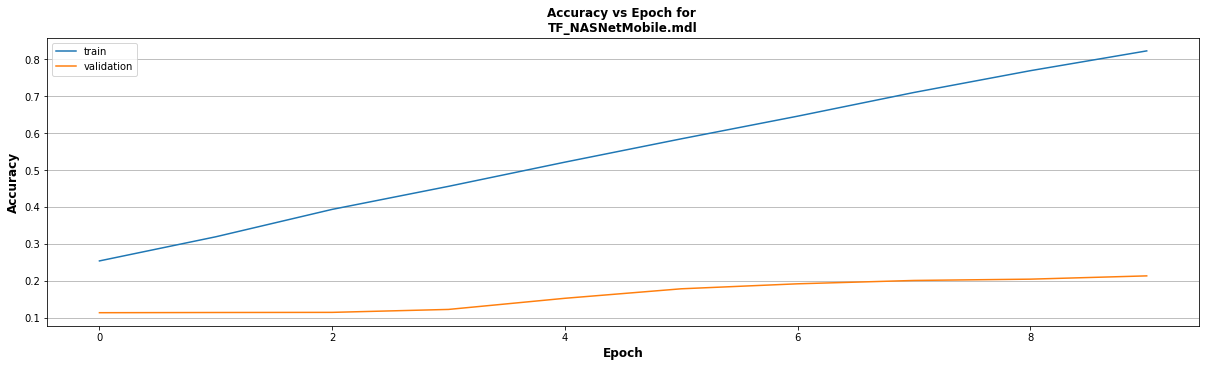

In [77]:
# Comparison of number of layers

#models.append({'model':modelName, 'learn_rate':lr, 'activation':actFunc, 'numLayers':numLayers, 'numUnits':numUnits, 'hist':hist.history})
for modelIndex in range(len(models)):
  histAcc = models[modelIndex]['hist']['accuracy']
  histValAcc = models[modelIndex]['hist']['val_accuracy']


  fig = plt.figure(figsize=(16,4))
  ax = fig.add_axes([0,0,1,1])
  ax.grid(axis='y', which='both')
  ax.set_axisbelow(True)
  ax.set_ylabel('Accuracy', fontsize='large', fontweight='bold')
  ax.set_xlabel('Epoch', fontsize='large', fontweight='bold')
  ax.set_title('Accuracy vs Epoch for \n' +  models[modelIndex]['model'] , fontsize='large', fontweight='bold')
  
  plt.plot(histAcc)
  plt.plot(histValAcc)
  ax.legend(['train', 'validation'])
  plt.show()



In [63]:
models = pickle.load(open(model_flder + 'normal_tf_top_models.p', 'rb'))   

modelsTrained = [m['model'] for m in models]
modelsTrained


['TF_top_ResNet50.mdl',
 'TF_top_VGG16.mdl',
 'TF_top_MobileNet.mdl',
 'TF_top_DenseNet121.mdl']

In [64]:
maxIter = 10
model_flder = '/content/drive/Shared drives/DS8013/Model/'

if blnBuildModel:
  #models = []
  TF_top_models = []
  for baseModel in baseModels:
    print('base:' + baseModel['name'])
    if 'TF_top_' + baseModel['name'] + '.mdl' not in modelsTrained: 
      model = Sequential([baseModel['model'],  layers.Flatten(),
                        layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001))])

      #make all layers non-trainable except for last layer
      for layer in model.layers[:-1]:
        layer.trainable = False

      #optimizer
      lr = 1e-4
      sgd = optimizers.SGD(learning_rate=lr, momentum=0.9, nesterov=True)

      # Compile the model
      model.compile(loss=keras.losses.categorical_crossentropy, optimizer=sgd, metrics=["accuracy"])
      
      if baseModel['input_shape'] == (64,64):
        hist = model.fit(X_train, y_train, epochs=maxIter, validation_data = (X_test, y_test), verbose=1)
      else:   #some architecture requires larger size
        X_train_img = [Image.fromarray(x, 'RGB') for x in X_train]
        X_test_img = [Image.fromarray(x, 'RGB') for x in X_test]

        X_train_resized = np.array([np.asarray(img.resize(baseModel['input_shape'])) for img in X_train_img])
        X_test_resized = np.array([np.asarray(img.resize(baseModel['input_shape'])) for img in X_test_img])
        hist = model.fit(X_train_resized, y_train, epochs=maxIter, validation_data = (X_test_resized, y_test), verbose=1)


      modelName = 'TF_top_{0}.mdl'.format(baseModel['name'])
      
      model.save(model_flder + modelName)

      TF_top_models.append(model)
      models.append({'model':modelName, 'learn_rate':lr, 'hist':hist.history})

      pickle.dump(models, open(model_flder + 'normal_tf_top_models.p' , "wb" ) )

      model.summary()
    else:
      print('already trained')
else:
  models = pickle.load(open(model_flder + 'normal_tf_top_models.p', 'rb'))    

base:ResNet50
already trained
base:ResNet101
Epoch 1/10
675/675 [==============================] - 23s 33ms/step - loss: 0.2901 - accuracy: 0.9200 - val_loss: 0.2465 - val_accuracy: 0.9306
Epoch 2/10
675/675 [==============================] - 20s 30ms/step - loss: 0.0825 - accuracy: 0.9809 - val_loss: 0.2237 - val_accuracy: 0.9385
Epoch 3/10
675/675 [==============================] - 20s 30ms/step - loss: 0.0603 - accuracy: 0.9888 - val_loss: 0.2149 - val_accuracy: 0.9420
Epoch 4/10
675/675 [==============================] - 20s 30ms/step - loss: 0.0493 - accuracy: 0.9930 - val_loss: 0.2105 - val_accuracy: 0.9439
Epoch 5/10
675/675 [==============================] - 20s 30ms/step - loss: 0.0428 - accuracy: 0.9954 - val_loss: 0.2080 - val_accuracy: 0.9459
Epoch 6/10
675/675 [==============================] - 20s 30ms/step - loss: 0.0386 - accuracy: 0.9969 - val_loss: 0.2058 - val_accuracy: 0.9467
Epoch 7/10
675/675 [==============================] - 20s 30ms/step - loss: 0.0356 - accura

In [67]:
# Comparison of all models

modelName = [m['model'] for i,m in enumerate(models) ]
modelAccuracy = [m['hist']['val_accuracy'][maxIter - 1] for m in models ]
modelLoss = [m['hist']['val_loss'][maxIter-1] for m in models ]

df = pd.DataFrame({'model':modelName, 'accuracy':modelAccuracy, 'loss':modelLoss})
df = df.sort_values('accuracy', ascending=False)

df

,model,accuracy,loss
1,TF_top_VGG16.mdl,0.965370,0.128038
3,TF_top_DenseNet121.mdl,0.964630,0.136570
0,TF_top_ResNet50.mdl,0.956111,0.173984
2,TF_top_MobileNet.mdl,0.953704,0.177114
4,TF_top_ResNet101.mdl,0.949815,0.202453
5,TF_top_ResNet152.mdl,0.922222,0.598444
8,TF_top_NASNetMobile.mdl,0.334259,2.004329
6,TF_top_InceptionV3.mdl,0.324630,1.867669
7,TF_top_InceptionResNetV2.mdl,0.297407,2.427255


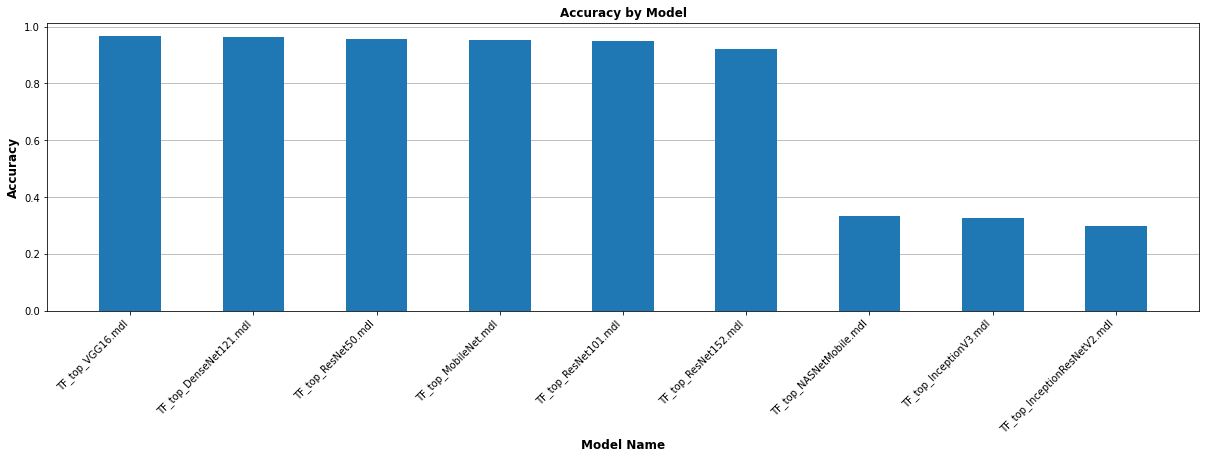

In [69]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_axes([0,0,1,1])
ax.grid(axis='y', which='both')
ax.set_axisbelow(True)
ax.bar(df.model,df.accuracy, width=0.5)
ax.set_ylabel('Accuracy', fontsize='large', fontweight='bold')
ax.set_xlabel('Model Name', fontsize='large', fontweight='bold')
ax.set_title('Accuracy by Model', fontsize='large', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

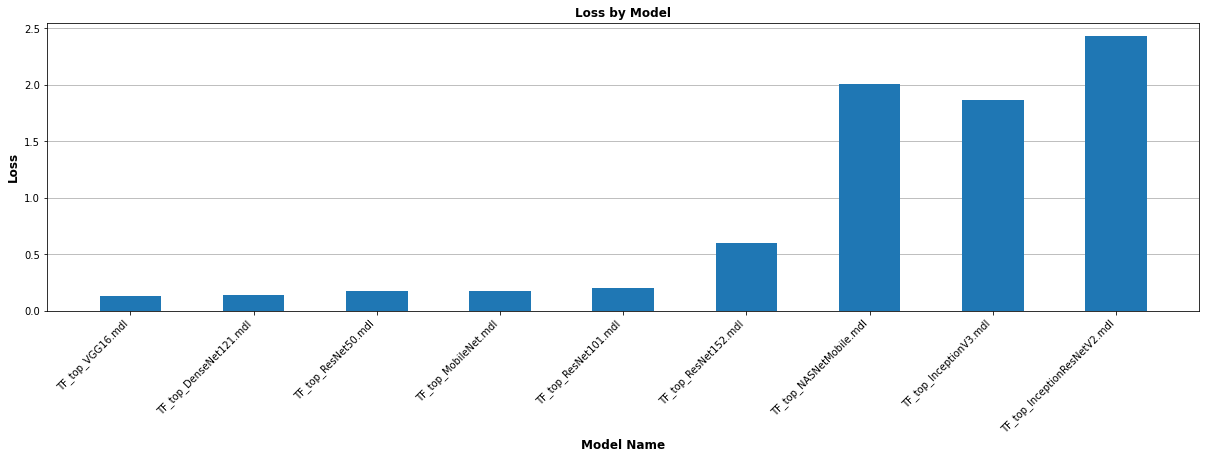

In [70]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_axes([0,0,1,1])
ax.grid(axis='y', which='both')
ax.set_axisbelow(True)
ax.bar(df.model,df.loss, width=0.5)
ax.set_ylabel('Loss', fontsize='large', fontweight='bold')
ax.set_xlabel('Model Name', fontsize='large', fontweight='bold')
ax.set_title('Loss by Model', fontsize='large', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

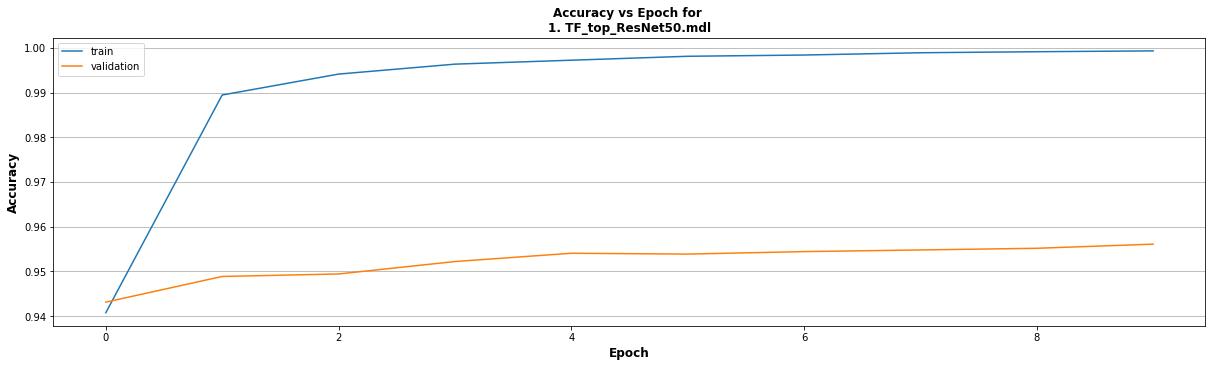

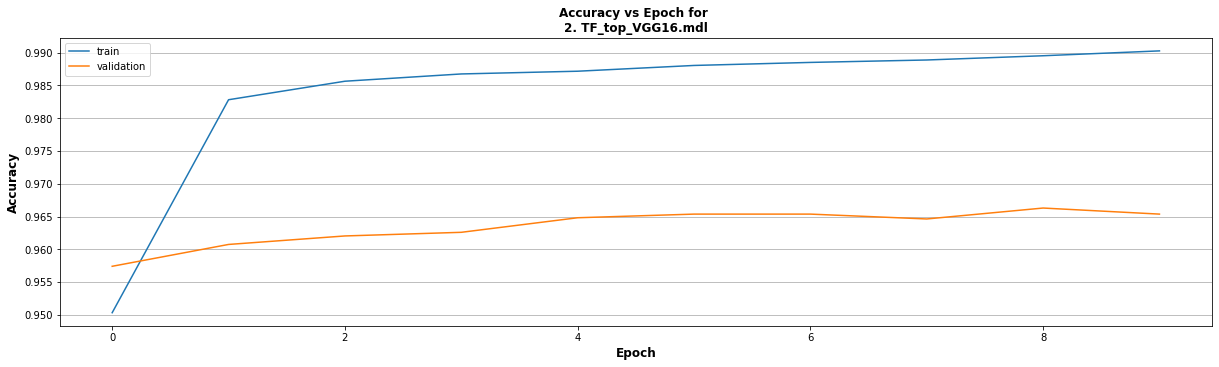

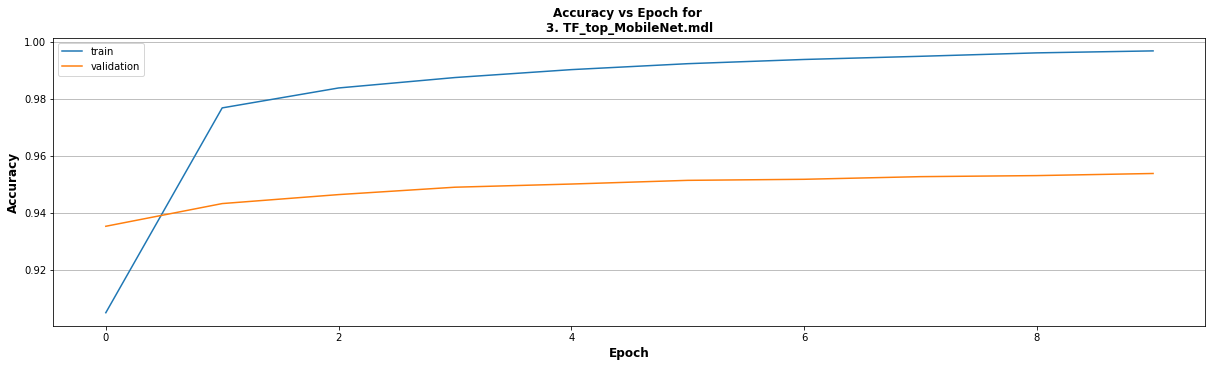

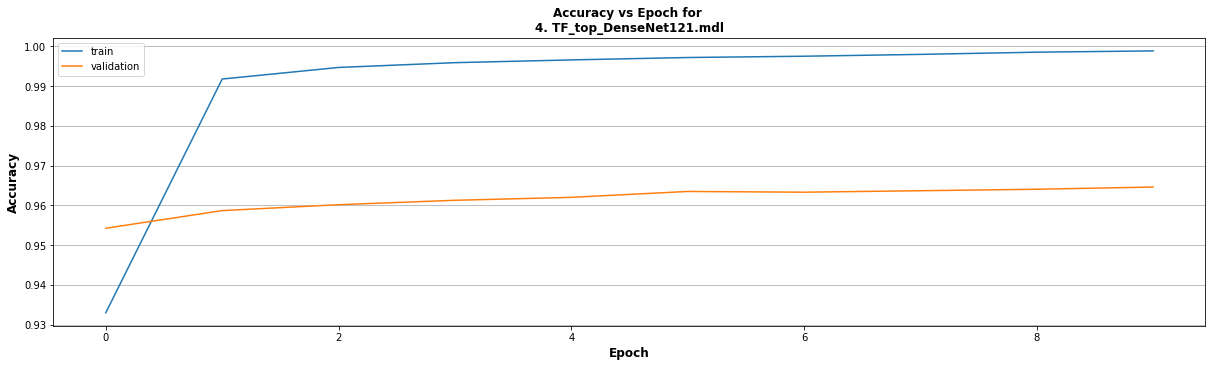

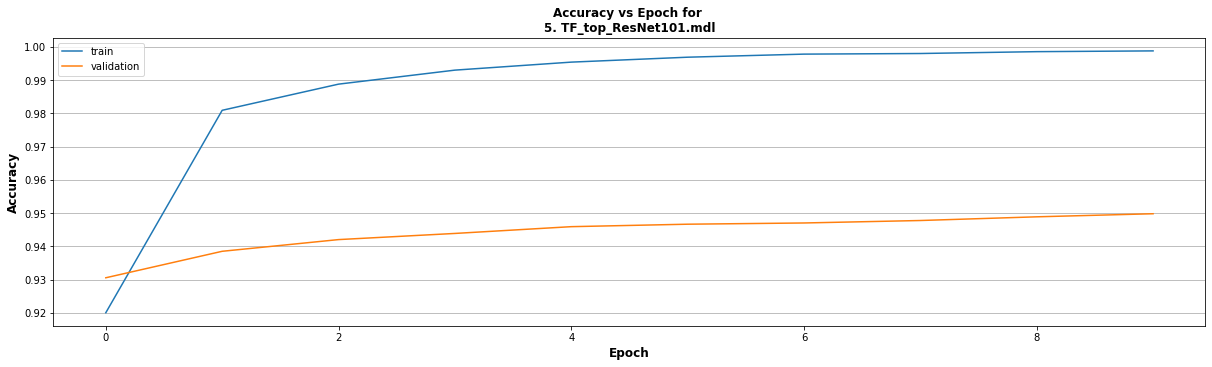

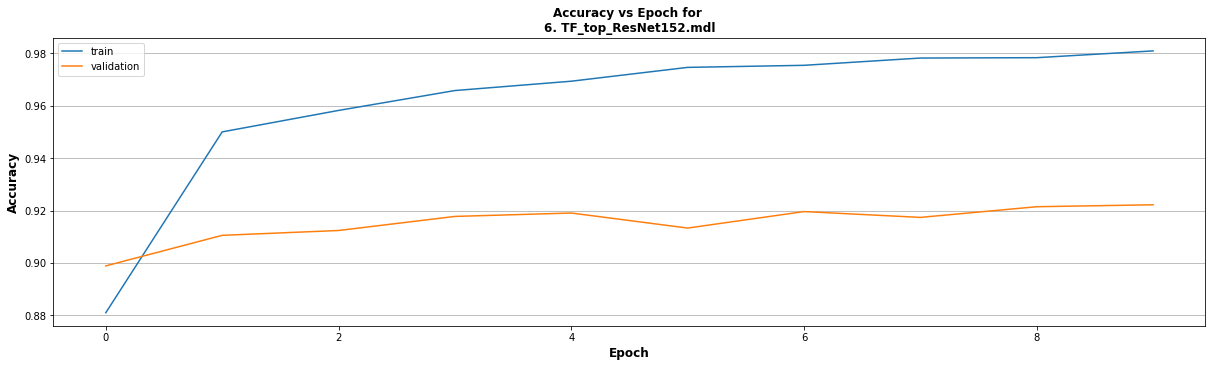

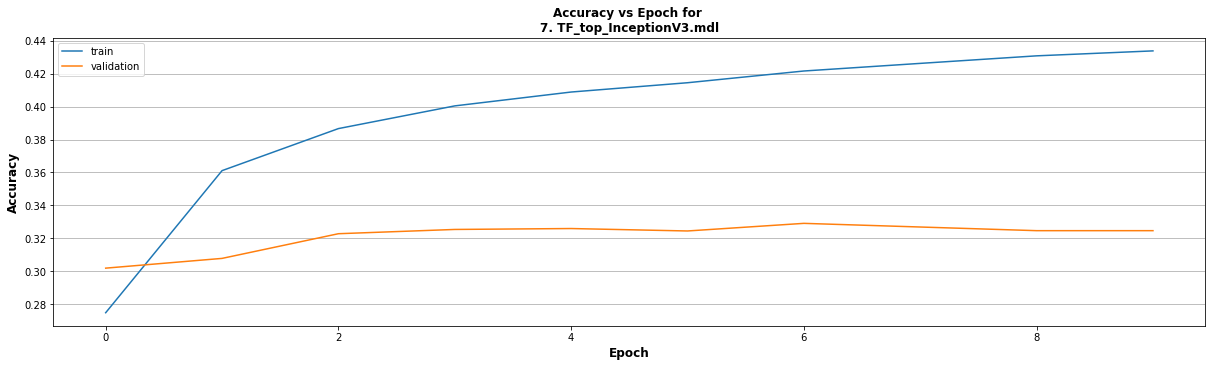

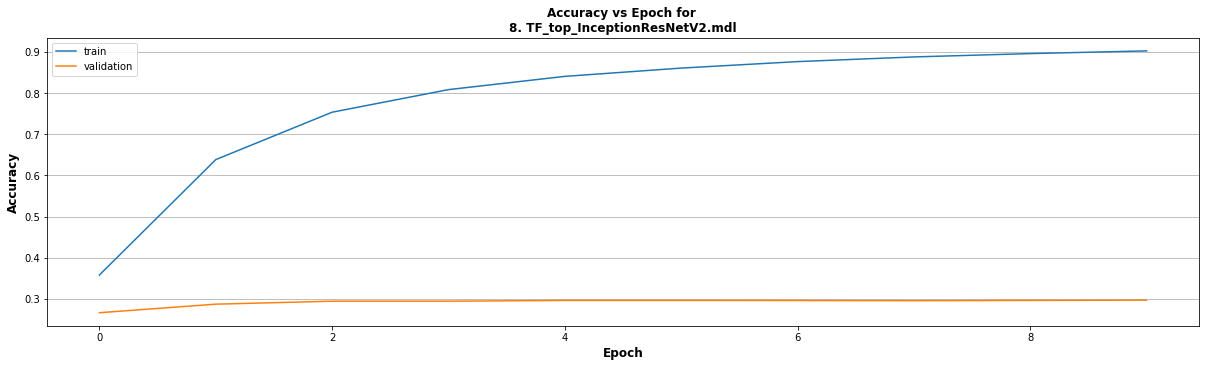

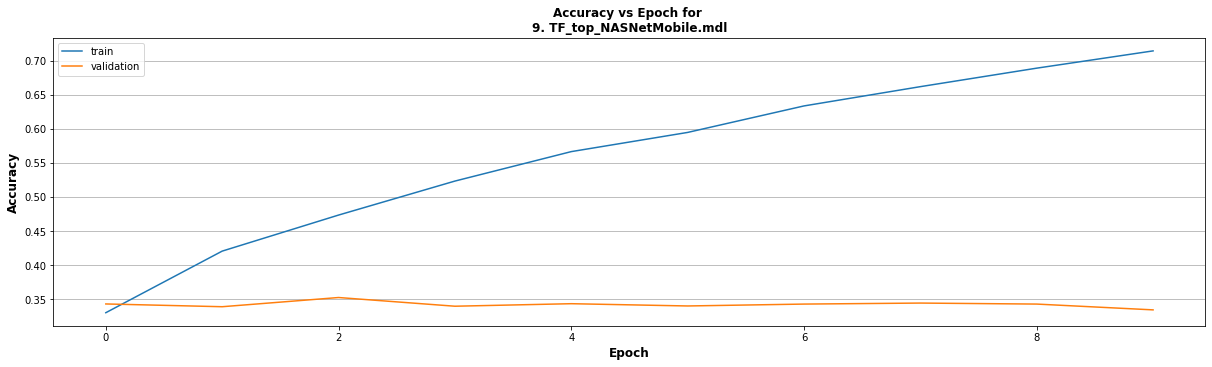

In [71]:
# Comparison of number of layers

#models.append({'model':modelName, 'learn_rate':lr, 'activation':actFunc, 'numLayers':numLayers, 'numUnits':numUnits, 'hist':hist.history})
for modelIndex in range(len(models)):
  histAcc = models[modelIndex]['hist']['accuracy']
  histValAcc = models[modelIndex]['hist']['val_accuracy']


  fig = plt.figure(figsize=(16,4))
  ax = fig.add_axes([0,0,1,1])
  ax.grid(axis='y', which='both')
  ax.set_axisbelow(True)
  ax.set_ylabel('Accuracy', fontsize='large', fontweight='bold')
  ax.set_xlabel('Epoch', fontsize='large', fontweight='bold')
  ax.set_title('Accuracy vs Epoch for \n' + str(modelIndex + 1) + '. ' +  models[modelIndex]['model'] , fontsize='large', fontweight='bold')
  
  plt.plot(histAcc)
  plt.plot(histValAcc)
  ax.legend(['train', 'validation'])
  plt.show()


In [65]:
print('jjjjjjjj      h                               jjj jjjjjjjjj')

jjjjjjjj    h                               jjj jjjjjjjjj


In [66]:
print('jjjjjjjjj       as    ha t  i      t he         g    c                                                             jjj jjjjjj')

jjjjjjjjj       t he         g    c                                                             jjj jjjjjj


In [0]:
   pr    T     the 